In [1]:
# References:
# User Guide - Merge, join, and concatenate: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# Data Schools top pandas tricks: https://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/top_25_pandas_tricks.ipynb
# Matplotlib basics: https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'C:\\Users\\K\\AIDeepDiveMaterials\\'

In [3]:
df1 = pd.read_csv(path+'SPTSXComposite.csv', index_col='Ticker')
print(df1.shape)
df1.head()

(132, 5)


,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector
Ticker,,,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,Materials
TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,Industrials
TSX:AGI,Alamos Gold Inc. (TSX:AGI),4455.5,889.4,4.0,Materials
TSX:AQN,Algonquin Power & Utilities Corp. (TSX:AQN),12811.6,2247.9,2.0,Utilities
TSX:ATD.B,Alimentation Couche-Tard Inc. (TSX:ATD.B),30426.3,79562.8,3.0,Consumer Staples


In [4]:
df2 = pd.read_csv(path+'SPTSXCap_Employees.csv')
df2.head()

,Ticker,Name,MarketCapitalization,NumberEmployees
0,NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),15892.5,5990.0
1,TSX:AC,Air Canada (TSX:AC),11338.6,32600.0
2,TSX:AGI,Alamos Gold Inc. (TSX:AGI),3151.9,1700.0
3,TSX:AQN,Algonquin Power & Utilities Corp. (TSX:AQN),8000.0,2277.0
4,TSX:ATD.B,Alimentation Couche-Tard Inc. (TSX:ATD.B),47281.4,133000.0


In [5]:
print(df2.shape)

(142, 4)


In [6]:
# Drop columns, rows, duplicates

In [7]:
df2.duplicated()[:5]

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [8]:
df2.loc[df2.duplicated()]

,Ticker,Name,MarketCapitalization,NumberEmployees
132,TSX:ACB,Aurora Cannabis Inc. (TSX:ACB),8958.5,967.0
133,TSX:BTO,B2Gold Corp. (TSX:BTO),4105.6,3168.0
134,NasdaqGS:OTEX,Open Text Corporation (NasdaqGS:OTEX),14905.9,13100.0
135,TSX:PAAS,Pan American Silver Corp. (TSX:PAAS),3565.0,4530.0
136,TSX:PXT,Parex Resources Inc. (TSX:PXT),3129.7,279.0
137,TSX:TSGI,The Stars Group Inc. (TSX:TSGI),6113.9,4516.0
138,TSX:TD,The Toronto-Dominion Bank (TSX:TD),139949.9,87999.0
139,TSX:EMA,Emera Incorporated (TSX:EMA),12873.1,7523.0
140,TSX:EMP.A,Empire Company Limited (TSX:EMP.A),9112.5,123000.0
141,TSX:GOOS,Canada Goose Holdings Inc. (TSX:GOOS),6254.2,3932.0


In [9]:
df2 = df2.drop_duplicates(keep='first')
print(df2.shape)

(132, 4)


In [10]:
# Exercise: 
# 1. Determine the current the current index labels for both dataframes
print(df1.index)
print(df2.index)

Index(['NYSE:AEM', 'TSX:AC', 'TSX:AGI', 'TSX:AQN', 'TSX:ATD.B', 'TSX:AP.UN',
       'TSX:ALA', 'TSX:ACO.X', 'TSX:ACB', 'TSX:BTO',
       ...
       'TSX:TIH', 'TSX:TOU', 'TSX:RNW', 'TSX:VET', 'NYSE:WCN', 'TSX:WFT',
       'TSX:WJA', 'TSX:WPM', 'TSX:WSP', 'TSX:YRI'],
      dtype='object', name='Ticker', length=132)
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            122, 123, 124, 125, 126, 127, 128, 129, 130, 131],
           dtype='int64', length=132)


In [11]:
# 2. Set the indices to 'Ticker', if not already

df2 = df2.set_index('Ticker')

df2.index

Index(['NYSE:AEM', 'TSX:AC', 'TSX:AGI', 'TSX:AQN', 'TSX:ATD.B', 'TSX:AP.UN',
       'TSX:ALA', 'TSX:ACO.X', 'TSX:ACB', 'TSX:BTO',
       ...
       'TSX:TIH', 'TSX:TOU', 'TSX:RNW', 'TSX:VET', 'NYSE:WCN', 'TSX:WFT',
       'TSX:WJA', 'TSX:WPM', 'TSX:WSP', 'TSX:YRI'],
      dtype='object', name='Ticker', length=132)

In [12]:
# Merging - SQL like
df3 = pd.merge(df1,df2, on='Ticker', how='left')
print(df3.shape)
df3.head(3)

# Note automatix suffix

(132, 8)


,Name_x,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector,Name_y,MarketCapitalization,NumberEmployees
Ticker,,,,,,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,Materials,Agnico Eagle Mines Limited (NYSE:AEM),15892.5,5990.0
TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,Industrials,Air Canada (TSX:AC),11338.6,32600.0
TSX:AGI,Alamos Gold Inc. (TSX:AGI),4455.5,889.4,4.0,Materials,Alamos Gold Inc. (TSX:AGI),3151.9,1700.0


In [13]:
# Join - very similar to merge but "on" defaults to index
df3 = df1.join(df2, how='left', rsuffix='2') # Suffix must be supplied if columns of the same name exist in both
print(df3.shape)
df3.head()

(132, 8)


,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector,Name2,MarketCapitalization,NumberEmployees
Ticker,,,,,,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,Materials,Agnico Eagle Mines Limited (NYSE:AEM),15892.5,5990.0
TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,Industrials,Air Canada (TSX:AC),11338.6,32600.0
TSX:AGI,Alamos Gold Inc. (TSX:AGI),4455.5,889.4,4.0,Materials,Alamos Gold Inc. (TSX:AGI),3151.9,1700.0
TSX:AQN,Algonquin Power & Utilities Corp. (TSX:AQN),12811.6,2247.9,2.0,Utilities,Algonquin Power & Utilities Corp. (TSX:AQN),8000.0,2277.0
TSX:ATD.B,Alimentation Couche-Tard Inc. (TSX:ATD.B),30426.3,79562.8,3.0,Consumer Staples,Alimentation Couche-Tard Inc. (TSX:ATD.B),47281.4,133000.0


In [14]:
# Creating slices
lil_df1 = df1.sample(3, random_state=22)
lil_df2 = df2.sample(4, random_state=22)
lil_df3 = df1.sample(1, random_state=22)

lil_df1

,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector
Ticker,,,,,
TSX:TD,The Toronto-Dominion Bank (TSX:TD),1334903.0,36354.0,3.0,Financials
NYSE:QSR,Restaurant Brands International Inc. (NYSE:QSR),27483.2,7309.8,3.0,Consumer Discretionary
TSX:YRI,Yamana Gold Inc. (TSX:YRI),10933.9,2454.1,5.0,Materials


In [15]:
for lil_df in [lil_df1, lil_df2, lil_df3]:
    print(lil_df.shape)

(3, 5)
(4, 3)
(1, 5)


In [16]:
# Concatenating
big_df = pd.concat([lil_df1, lil_df2, lil_df3],sort=False) 
print(big_df.shape)
print()
big_df

(8, 7)



,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector,MarketCapitalization,NumberEmployees
Ticker,,,,,,,
TSX:TD,The Toronto-Dominion Bank (TSX:TD),1334903.0,36354.0,3.0,Financials,NaN,NaN
NYSE:QSR,Restaurant Brands International Inc. (NYSE:QSR),27483.2,7309.8,3.0,Consumer Discretionary,NaN,NaN
TSX:YRI,Yamana Gold Inc. (TSX:YRI),10933.9,2454.1,5.0,Materials,NaN,NaN
TSX:TD,The Toronto-Dominion Bank (TSX:TD),NaN,NaN,NaN,NaN,139949.9,87999.0
NYSE:QSR,Restaurant Brands International Inc. (NYSE:QSR),NaN,NaN,NaN,NaN,24044.9,6000.0
TSX:YRI,Yamana Gold Inc. (TSX:YRI),NaN,NaN,NaN,NaN,3268.9,5165.0
TSX:MG,Magna International Inc. (TSX:MG),NaN,NaN,NaN,NaN,19736.3,168000.0
TSX:TD,The Toronto-Dominion Bank (TSX:TD),1334903.0,36354.0,3.0,Financials,NaN,NaN


In [17]:
big_df.tail(1)

,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector,MarketCapitalization,NumberEmployees
Ticker,,,,,,,
TSX:TD,The Toronto-Dominion Bank (TSX:TD),1334903.0,36354.0,3.0,Financials,NaN,NaN


In [18]:
# What would happen if lil_df3 didn't have all of the same columns as lil_df1 and lil_df2?

In [40]:
# Append 
lil_df2.append(lil_df3, sort=False)

,Name,MarketCapitalization,NumberEmployees,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector
Ticker,,,,,,,
TSX:TD,The Toronto-Dominion Bank (TSX:TD),139949.9,87999.0,NaN,NaN,NaN,NaN
NYSE:QSR,Restaurant Brands International Inc. (NYSE:QSR),24044.9,6000.0,NaN,NaN,NaN,NaN
TSX:YRI,Yamana Gold Inc. (TSX:YRI),3268.9,5165.0,NaN,NaN,NaN,NaN
TSX:MG,Magna International Inc. (TSX:MG),19736.3,168000.0,NaN,NaN,NaN,NaN
TSX:TD,The Toronto-Dominion Bank (TSX:TD),NaN,NaN,1334903.0,36354.0,3.0,Financials


In [20]:
lil_df2.append({'MarketCapitalization':10000}, ignore_index=True) # Great in instance where need to append 1 row only

,Name,MarketCapitalization,NumberEmployees
0,The Toronto-Dominion Bank (TSX:TD),139949.9,87999.0
1,Restaurant Brands International Inc. (NYSE:QSR),24044.9,6000.0
2,Yamana Gold Inc. (TSX:YRI),3268.9,5165.0
3,Magna International Inc. (TSX:MG),19736.3,168000.0
4,NaN,10000.0,NaN


In [21]:
# Exercise:
# 1. Remove the column "Name"  from df2 (hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)


df2 = df2.drop(columns=['Name'])
#df2.drop(column=['Name'], inplace=True)
#df2 = df2.drop(['Name'], axis=1)
df2.columns

Index(['MarketCapitalization', 'NumberEmployees'], dtype='object')

In [22]:
#df2.drop(columns=['Name'])

In [23]:
#df2.drop(columns=['Name'], inplace=True)

In [24]:
# 2. Verify that all of the indices in df1 are in df2

list(df1.index)==list(df2.index)

df1.index.isin(df2.index).all()

df1.index.equals(df2.index)

True

In [25]:
# 4. Combine df1 and df2 into one dataframe 

df3 = df1.join(df2)

print(df3.shape)
df3.head()

(132, 7)


,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector,MarketCapitalization,NumberEmployees
Ticker,,,,,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,Materials,15892.5,5990.0
TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,Industrials,11338.6,32600.0
TSX:AGI,Alamos Gold Inc. (TSX:AGI),4455.5,889.4,4.0,Materials,3151.9,1700.0
TSX:AQN,Algonquin Power & Utilities Corp. (TSX:AQN),12811.6,2247.9,2.0,Utilities,8000.0,2277.0
TSX:ATD.B,Alimentation Couche-Tard Inc. (TSX:ATD.B),30426.3,79562.8,3.0,Consumer Staples,47281.4,133000.0


In [26]:
# 5. Check for NaN values anywhere in the dataframe (df.isna.any())

df3.isna().any()

Name                    False
TotalAssets             False
TotalRevenue            False
GeographicSegments       True
PrimarySector           False
MarketCapitalization    False
NumberEmployees          True
dtype: bool

In [27]:
# 6. Add another row for a fictional or real company of your choice
print(df3.columns)
df3.loc['TSX:VUP'] = {'Name':'CICOLAC VUP','TotalAssets':23200,'TotalRevenue':4500,'GeographicSegments':2,'PrimarySector':'Manufacturing','MarketCapitalization':12000,'NumberEmployees':50}

df3.tail(1)


Index(['Name', 'TotalAssets', 'TotalRevenue', 'GeographicSegments',
       'PrimarySector', 'MarketCapitalization', 'NumberEmployees'],
      dtype='object')


,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector,MarketCapitalization,NumberEmployees
Ticker,,,,,,,
TSX:VUP,CICOLAC VUP,23200.0,4500.0,2.0,Manufacturing,12000.0,50.0


In [28]:
df3.index.values

array(['NYSE:AEM', 'TSX:AC', 'TSX:AGI', 'TSX:AQN', 'TSX:ATD.B',
       'TSX:AP.UN', 'TSX:ALA', 'TSX:ACO.X', 'TSX:ACB', 'TSX:BTO',
       'TSX:BMO', 'TSX:ABX', 'NYSE:BHC', 'TSX:BCE', 'TSX:BB', 'TSX:BBD.B',
       'TSX:BYD.UN', 'TSX:BAM.A', 'NYSE:BBU', 'NYSE:BIP', 'NasdaqGS:BPY',
       'TSX:BEP.UN', 'TSX:DOO', 'TSX:CAE', 'TSX:CCO', 'TSX:GOOS',
       'TSX:CAR.UN', 'TSX:CM', 'TSX:CNR', 'TSX:CNQ', 'TSX:CP',
       'TSX:CTC.A', 'TSX:CU', 'TSX:WEED', 'TSX:CPX', 'TSX:CCL.B',
       'TSX:CVE', 'TSX:GIB.A', 'TSX:CSH.UN', 'TSX:CHP.UN', 'TSX:CIX',
       'TSX:CCA', 'TSX:CIGI', 'TSX:CSU', 'TSX:CRON', 'TSX:DGC', 'TSX:DOL',
       'TSX:EFN', 'TSX:EMA', 'TSX:EMP.A', 'TSX:ENB', 'TSX:ECA', 'TSX:FFH',
       'TSX:FTT', 'TSX:FCR', 'TSX:FM', 'TSX:FSV', 'TSX:FTS', 'TSX:FNV',
       'TSX:MIC', 'TSX:WN', 'TSX:GEI', 'TSX:GIL', 'TSX:GRT.UN', 'TSX:GWO',
       'TSX:HR.UN', 'TSX:HSE', 'TSX:H', 'TSX:IAG', 'TSX:IGM', 'TSX:IMO',
       'TSX:IFC', 'TSX:IPL', 'TSX:KEY', 'TSX:K', 'TSX:KL', 'TSX:L',
       'TSX:LUN', 

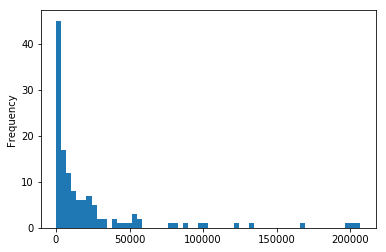

In [29]:
# Plotting
df2.NumberEmployees.plot.hist(bins=60)

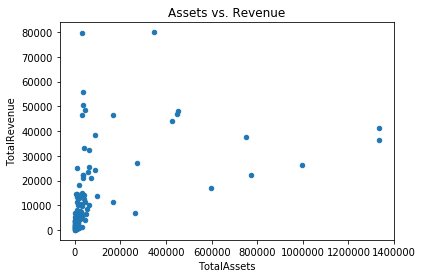

In [30]:
df1.plot.scatter('TotalAssets', 'TotalRevenue')
plt.title('Assets vs. Revenue') # interfaces with matplotlib
plt.show()

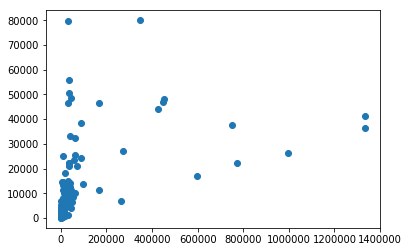

In [31]:
plt.scatter(df1.TotalAssets, df1.TotalRevenue)



In [32]:
# Handy tricks

In [33]:
# Create dummy variables
dummy_df = pd.get_dummies(df1,columns=['PrimarySector'])
print(dummy_df.columns)
dummy_df.head(3)

Index(['Name', 'TotalAssets', 'TotalRevenue', 'GeographicSegments',
       'PrimarySector_Communication Services',
       'PrimarySector_Consumer Discretionary',
       'PrimarySector_Consumer Staples', 'PrimarySector_Energy',
       'PrimarySector_Financials', 'PrimarySector_Health Care',
       'PrimarySector_Industrials', 'PrimarySector_Information Technology',
       'PrimarySector_Materials', 'PrimarySector_Real Estate',
       'PrimarySector_Utilities'],
      dtype='object')


,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector_Communication Services,PrimarySector_Consumer Discretionary,PrimarySector_Consumer Staples,PrimarySector_Energy,PrimarySector_Financials,PrimarySector_Health Care,PrimarySector_Industrials,PrimarySector_Information Technology,PrimarySector_Materials,PrimarySector_Real Estate,PrimarySector_Utilities
Ticker,,,,,,,,,,,,,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,0,0,0,0,0,0,0,0,1,0,0
TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,0,0,0,0,0,0,1,0,0,0,0
TSX:AGI,Alamos Gold Inc. (TSX:AGI),4455.5,889.4,4.0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
# Create bins
df1['RevenueLevels']=pd.cut(df1.TotalRevenue,3, labels=['Low', 'Medium', 'High'])
print(df1.loc[df1.RevenueLevels=='High'].sample(3))

                                                   Name  TotalAssets  \
Ticker                                                                 
TSX:ATD.B     Alimentation Couche-Tard Inc. (TSX:ATD.B)      30426.3   
TSX:BAM.A  Brookfield Asset Management Inc. (TSX:BAM.A)     349705.7   
TSX:MG                Magna International Inc. (TSX:MG)      35403.0   

           TotalRevenue  GeographicSegments           PrimarySector  \
Ticker                                                                
TSX:ATD.B       79562.8                 3.0        Consumer Staples   
TSX:BAM.A       79975.7                 9.0              Financials   
TSX:MG          55710.1                20.0  Consumer Discretionary   

          RevenueLevels  
Ticker                   
TSX:ATD.B          High  
TSX:BAM.A          High  
TSX:MG             High  


In [35]:
# Correlation matrix
df1.corr()

,TotalAssets,TotalRevenue,GeographicSegments
TotalAssets,1.000000,0.46042,-0.022675
TotalRevenue,0.460420,1.00000,0.092280
GeographicSegments,-0.022675,0.09228,1.000000


In [36]:
# Complex conditions 
rbc = df2.loc['TSX:RY']
print(rbc)

bigger_than_rbc = df2.loc[(df2.MarketCapitalization>rbc.MarketCapitalization) | (df2.NumberEmployees>rbc.NumberEmployees)]
bigger_than_rbc

MarketCapitalization    149713.5
NumberEmployees          82197.0
Name: TSX:RY, dtype: float64


,MarketCapitalization,NumberEmployees
Ticker,,
TSX:ATD.B,47281.4,133000.0
TSX:BAM.A,61229.8,101700.0
TSX:EMP.A,9112.5,123000.0
TSX:WN,15523.3,203238.0
TSX:L,24652.0,200000.0
TSX:MG,19736.3,168000.0
TSX:ONEX,8135.8,207000.0
TSX:BNS,85329.1,99678.0
TSX:TD,139949.9,87999.0


In [37]:
# Create a new variable based on conditions
df1['International']=np.where(df1.GeographicSegments>3, True, False) 
# Alternative ways of acheiving this same task: https://datatofish.com/if-condition-in-pandas-dataframe/

df1[['Name','GeographicSegments', 'International']].sample(10)

,Name,GeographicSegments,International
Ticker,,,
TSX:TFII,TFI International Inc. (TSX:TFII),3.0,False
TSX:MIC,Genworth MI Canada Inc. (TSX:MIC),1.0,False
TSX:MX,Methanex Corporation (TSX:MX),12.0,True
TSX:FM,First Quantum Minerals Ltd. (TSX:FM),24.0,True
TSX:SNC,SNC-Lavalin Group Inc. (TSX:SNC),11.0,True
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),5.0,True
TSX:BB,BlackBerry Limited (TSX:BB),7.0,True
TSX:PAAS,Pan American Silver Corp. (TSX:PAAS),NaN,False
TSX:NPI,Northland Power Inc. (TSX:NPI),2.0,False


Text(0.5,1,'Histogram of Geographic Segments')

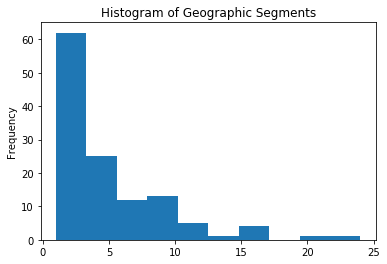

In [38]:
# Exercise:
# 1. Plot the distribution of GeographicSegments
    # Comment on what you see
    # Add a title
    
df1.GeographicSegments.plot.hist()
plt.title('Histogram of Geographic Segments')

In [39]:
# 2 How many companies have both larger market capitalization AND more employees than RBC?

bigger_than_rbc2 = df2.loc[(df2.MarketCapitalization>rbc.MarketCapitalization) & (df2.NumberEmployees>rbc.NumberEmployees)]
bigger_than_rbc2

,MarketCapitalization,NumberEmployees
Ticker,,
